In [4]:
import os

In [5]:
import urllib

In [6]:
import zipfile

In [7]:
ls

Exploration 2.ipynb  Exploration 3.ipynb  Exploration.ipynb


# Data

Let's establish the path of a new data folder just for this notebook so we can download the data into it from the notebook.

In [10]:
data_folder_path = "../"

dataFolderName = "Data-Exploration-3"

In [11]:
data_folder_path = os.path.join(data_folder_path,dataFolderName)
data_folder_path

'../Data-Exploration-3'

In [7]:
!mkdir "../Data-Exploration-3"

### USGS GAP Landcover Data for Texas

This is the URL for downloading the zip file of USGS Gap Landcover data. It exists for the entire US but we'll just use Texas for now.

In [8]:
url_landcover_USGS_zipFile = "https://s3-us-west-2.amazonaws.com/mrlc/nlcd_2019_land_cover_l48_20210604.zip"

Making a file and full file path

In [9]:
filename_landcover_USGS = "landcover_USGS_texas.zip"

In [10]:
file_path_landcover_USGS_texas = os.path.join(data_folder_path,filename_landcover_USGS)

In [11]:
file_path_landcover_USGS_texas

'../Data-Exploration-3/landcover_USGS_texas.zip'

Making a file path for content on unzipped landcover data

In [13]:
file_path_unzipped_landcover_USGS_texas = os.path.join(data_folder_path,"landcover_USGS_CONUS")

In [14]:
file_path_unzipped_landcover_USGS_texas

'../Data-Exploration-3/landcover_USGS_CONUS'

Running the cell below may take a few minutes due to the size of the TIFF file in the zip file.

In [15]:

urllib.request.urlretrieve(url_landcover_USGS_zipFile, file_path_landcover_USGS_texas )

('../Data-Exploration-3/landcover_USGS_texas.zip',
 <http.client.HTTPMessage at 0x104548df0>)

Checking that it is there and unzipping.

In [16]:
with zipfile.ZipFile(file_path_landcover_USGS_texas, 'r') as zip_ref:
    zip_ref.extractall(file_path_unzipped_landcover_USGS_texas)

In [17]:
cd '../Data-Exploration-3/landcover_USGS_CONUS'

/Users/justingosses/Code/river-maps-experiments/Data-Exploration-3/landcover_USGS_CONUS


In [18]:
ls

nlcd_2019_land_cover_l48_20210604.ige  nlcd_2019_land_cover_l48_20210604.rrd
nlcd_2019_land_cover_l48_20210604.img  nlcd_2019_land_cover_l48_20210604.xml
nlcd_2019_land_cover_l48_20210604.rde


In [18]:
cd ../../

/Users/justingosses/Code/river-maps-experiments


In [19]:
cd notebooks/

/Users/justingosses/Code/river-maps-experiments/notebooks


In [20]:
ls

Exploration 2.ipynb  Exploration.ipynb


# New Data
https://planetarycomputer.microsoft.com/explore?c=-93.0000%2C30.2561&z=6.56&v=2&d=io-lulc-9-class&m=2021&r=Default&s=false%3A%3A100%3A%3Atrue&ae=0

In [61]:
import pystac
import planetary_computer
import rioxarray

In [62]:
#%matplotlib inline




%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(200, 200))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['Widget', 'interactive', 'Rectangle', 'Circle', 'isnan', 'copy', 'Polygon', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<Figure size 14400x14400 with 0 Axes>

<Figure size 14400x14400 with 0 Axes>

In [63]:

item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/io-lulc-9-class/items/15R-2021"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets 
asset_href = signed_item.assets["data"].href
ds = rioxarray.open_rasterio(asset_href,masked=True,)
ds

<xarray.DataArray (band: 1, y: 89013, x: 61045)>
[5433798585 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 1.948e+05 1.948e+05 ... 8.052e+05 8.052e+05
  * y            (y) float64 3.544e+06 3.544e+06 ... 2.654e+06 2.654e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [64]:
ds.rio.crs

CRS.from_epsg(32615)

In [65]:
ds.rio.bounds()

(194773.70566898846, 2654231.5057707, 805223.7056689884, 3544361.5057707)

In [66]:
ds.rio.nodata

nan

In [67]:
shapes

[{'type': 'Polygon',
  'coordinates': [[(-95.48261387997346, 29.772747389295635),
    (-95.4826026142567, 29.77284138001742),
    (-95.4825789107488, 29.77294475555285),
    (-95.48254439214924, 29.773045039269856),
    (-95.48254164725702, 29.773051821622566),
    (-95.4825412480981, 29.773053808924455),
    (-95.48251575547948, 29.773153729214084),
    (-95.48248010823093, 29.773250492903323),
    (-95.4824346854231, 29.773343071013105),
    (-95.48237997007928, 29.773430479073575),
    (-95.48224137007949, 29.7736284124066),
    (-95.48216607630593, 29.77372316994071),
    (-95.4820798865495, 29.773808137396212),
    (-95.48195388654965, 29.77391813739605),
    (-95.48186927628005, 29.773984342692383),
    (-95.48177805187528, 29.774041089031076),
    (-95.48168126625094, 29.77408772144368),
    (-95.48153633291784, 29.774148188110264),
    (-95.48145591963402, 29.7741777597847),
    (-95.48119765296775, 29.77426035978457),
    (-95.48111549443435, 29.774282827674668),
    (-95.4810

In [69]:
shapes["crs"]

TypeError: list indices must be integers or slices, not str

In [70]:
clipped = ds.rio.clip(shapes,geodf_buffaloBayou_projectedOnlyBufferGeoRead.crs)


In [71]:
clipped

<xarray.DataArray (band: 1, y: 710, x: 7112)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2.266e+05 2.266e+05 ... 2.977e+05 2.977e+05
  * y            (y) float64 3.297e+06 3.297e+06 3.297e+06 ... 3.29e+06 3.29e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

https://gis.stackexchange.com/questions/346895/create-a-new-raster-tiff-file-which-is-masked-based-on-the-geojson-file/346899#346899

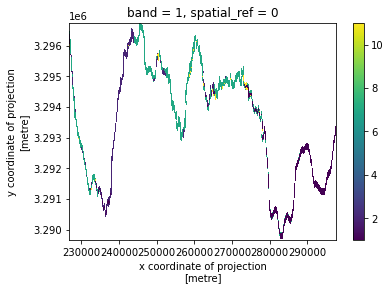

In [72]:
clipped.plot()
plt.show()

In [106]:
clipped[0][0]

<xarray.DataArray (x: 7112)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 2.266e+05 2.266e+05 ... 2.977e+05 2.977e+05
    y            float64 3.297e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [76]:
clipped_data = clipped.data

In [96]:
clipped_data.size

5049520

In [117]:
np.sum(clipped_data  == 1) 

60523

In [121]:
(clipped_data  == 1).size

5049520

In [118]:
np.sum(clipped_data  == 7) 

106526

In [122]:
(clipped_data  == 7).size

5049520

In [123]:
np.sum(clipped_data  == 7)/7

15218.0

In [124]:
np.sum(clipped_data  == 1)/1

60523.0

In [120]:
np.sum(clipped_data  == 0) 

0

In [119]:
clipped_data

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

In [116]:
print(np.sum(clipped_data  == clipped.rio.nodata) /clipped_data .size * 100)

0.0


In [87]:
print(np.sum(clipped_data  == 1) /clipped_data.size * 100)

1.1985891728322693


In [88]:
print(np.sum(clipped_data  == 2) /clipped_data.size * 100)

0.8182757965113516


In [80]:
print(np.sum(clipped_data  == 3) /clipped_data.size * 100)

0.0


In [112]:
print((clipped_data  == 4).size /clipped_data.size * 100)

100.0


In [91]:
print(np.sum(clipped_data  == 5) /clipped_data.size * 100)

0.0


In [92]:
print(np.sum(clipped_data  == 6) /clipped_data.size * 100)

0.0


5049520

In [111]:
print((clipped_data== 7).size /clipped_data.size * 100)

100.0


In [94]:
print(np.sum(clipped_data  == 8) /clipped_data.size * 100)

0.001267447202902454


In [95]:
print(np.sum(clipped_data  == 9) /clipped_data.size * 100)

0.0


In [98]:
print(np.sum(clipped_data  == 11) /clipped_data.size * 100)

0.13904291893090828


In [99]:
print(np.sum(clipped_data  == 12) /clipped_data.size * 100)

0.0


In [104]:
clipped_data

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

In [103]:
np.min(clipped_data)

nan

In [125]:
from pystac.extensions.item_assets import ItemAssetsExtension


In [128]:
client = dask.distributed.Client(processes=False)
print(f"/proxy/{client.scheduler_info()['services']['dashboard']}/status")

NameError: name 'dask' is not defined

In [127]:
catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

NameError: name 'Client' is not defined

In [126]:

collection = catalog.get_collection("io-lulc-9-class")
ia = ItemAssetsExtension.ext(collection)

x = ia.item_assets["data"]
class_names = {x["summary"]: x["values"][0] for x in x.properties["file:values"]}
values_to_classes = {v: k for k, v in class_names.items()}
class_count = len(class_names)
class_names

NameError: name 'catalog' is not defined

In [ ]:
{'No Data': 0,
 'Water': 1,
 'Trees': 2,
 'Flooded vegetation': 4,
 'Crops': 5,
 'Built area': 7,
 'Bare ground': 8,
 'Snow/ice': 9,
 'Clouds': 10,
 'Rangeland': 11}

### Flowlines for Water Bodies from USGS

Next let's download vector data for rivers in the Houston area.

We'll be using the "NHDPlus High Resolution (NHDPlus HR), National Hydrography Dataset (NHD), and Watershed Boundary Dataset (WBD) " dataset from USGS as described here: https://www.usgs.gov/national-hydrography/access-national-hydrography-products

There are a variety of ways to download this data, we'll just use a dataset that overlaps with central Houston for now as we care about Buffal Bayou: https://prd-tnm.s3.amazonaws.com/index.html?prefix=StagedProducts/Hydrography/NHD/HU8/Shape/

And in particular this one: "NHD_H_12040104_HU8_Shape" at 

In [12]:
download_link_NHD_H_12040104_HU8_Shape = "https://prd-tnm.s3.amazonaws.com/StagedProducts/Hydrography/NHD/HU8/Shape/NHD_H_12040104_HU8_Shape.zip"

In [13]:
file_path_rivers_NHD = os.path.join(data_folder_path,"rivers_NHD.zip")

In [14]:
urllib.request.urlretrieve(download_link_NHD_H_12040104_HU8_Shape, file_path_rivers_NHD)

('../Data-Exploration-3/rivers_NHD.zip',
 <http.client.HTTPMessage at 0x1083bff40>)

In [15]:
file_path_unzipped_rivers_NHD = os.path.join(data_folder_path,"rivers_NHD")

In [16]:
with zipfile.ZipFile(file_path_rivers_NHD, 'r') as zip_ref:
    zip_ref.extractall(file_path_unzipped_rivers_NHD)

In [17]:
cd "../Data-Exploration-3"

/Users/justingosses/Code/river-maps-experiments/Data-Exploration-3


In [18]:
ls

landcover_USGS_CONUS/     rivers_NHD/
landcover_USGS_texas.zip  rivers_NHD.zip


In [19]:
cd rivers_NHD

/Users/justingosses/Code/river-maps-experiments/Data-Exploration-3/rivers_NHD


In [20]:
ls

NHD_H_12040104_HU8_Shape.jpg  Shape/
NHD_H_12040104_HU8_Shape.xml


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


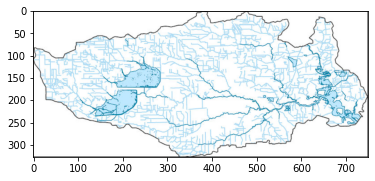

In [21]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('NHD_H_12040104_HU8_Shape.jpg')
imgplot = plt.imshow(img)
plt.show()

In [22]:
cd Shape

/Users/justingosses/Code/river-maps-experiments/Data-Exploration-3/rivers_NHD/Shape


In [23]:
ls

ExternalCrosswalk.dbf        NHDWaterbody.dbf
NHDArea.dbf                  NHDWaterbody.prj
NHDArea.prj                  NHDWaterbody.shp
NHDArea.shp                  NHDWaterbody.shx
NHDArea.shx                  WBDHU10.dbf
NHDAreaEventFC.dbf           WBDHU10.prj
NHDAreaEventFC.prj           WBDHU10.shp
NHDAreaEventFC.shp           WBDHU10.shx
NHDAreaEventFC.shx           WBDHU12.dbf
NHDFCode.dbf                 WBDHU12.prj
NHDFeatureToMetadata.dbf     WBDHU12.shp
NHDFlow.dbf                  WBDHU12.shx
NHDFlowline.dbf              WBDHU14.dbf
NHDFlowline.prj              WBDHU14.prj
NHDFlowline.shp              WBDHU14.shp
NHDFlowline.shx              WBDHU14.shx
NHDFlowlineVAA.dbf           WBDHU16.dbf
NHDLine.dbf                  WBDHU16.prj
NHDLine.prj                  WBDHU16.shp
NHDLine.shp                  WBDHU16.shx
NHDLine.shx                  WBDHU2.dbf
NHDLineEventFC.dbf           WBDHU2.prj
NHDLineEventFC.prj           WBDHU2.shp
NHDLineEventFC.shp           WBDHU2.shx


In [24]:
cd ../../../notebooks

/Users/justingosses/Code/river-maps-experiments/notebooks


In [25]:
ls

Exploration 2.ipynb  Exploration 3.ipynb  Exploration.ipynb


## Loading Data

### Flowlines for Water Bodies from USGS

In [26]:
import geopandas as gpd

In [27]:
file_path_rivers_NHD_shapeFile = os.path.join(file_path_unzipped_rivers_NHD,"Shape","NHDFlowline.shp")

In [28]:
shapefile = gpd.read_file(file_path_rivers_NHD_shapeFile )
print(type(shapefile))
print(shapefile)

<class 'geopandas.geodataframe.GeoDataFrame'>
     permanent_       fdate  resolution   gnis_id              gnis_name  \
0     113253061  2012-01-04           2      None                   None   
1     109566003  2012-01-04           2      None                   None   
2     113254783  2012-01-04           2  01373919           Greens Bayou   
3     113255589  2012-01-04           2      None                   None   
4     113255303  2012-01-04           2      None                   None   
...         ...         ...         ...       ...                    ...   
2877  113251823  2012-01-04           2      None                   None   
2878  113252195  2012-01-04           2      None                   None   
2879  113254411  2012-01-04           2      None                   None   
2880  113253935  2012-01-04           2  01374616  Little Whiteoak Bayou   
2881  113255137  2014-12-05           2      None                   None   

      lengthkm       reachcode  flowdir w

In [29]:
from ipyleaflet import *
import random


In [30]:
center = (29.7604, -95.498)

m2 = Map(center=center, zoom=13)

marker = Marker(location=center, draggable=True)
m2.add_layer(marker);


def random_color(feature):
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }

riverGeoData = GeoData(geo_dataframe = shapefile)

m2.add_layer(riverGeoData)


display(m2)

# Now that the marker is on the Map, you can drag it with your mouse,
# it will automatically update the `marker.location` attribute in Python

# You can also update the marker location from Python, that will update the
# marker location on the Map:
marker.location = (50, 356)

Map(center=[29.7604, -95.498], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Now we will just look at Buffalo Bayou instead of all fhte GNIS water body elements

In [31]:
geodf_buffaloBayou = shapefile[shapefile['gnis_name']=='Buffalo Bayou']

In [32]:
geodf_buffaloBayou.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [33]:
geodf_buffaloBayou.length

/var/folders/ry/tr7t3nh122z_0n6rz2cl3lv40000gn/T/ipykernel_91556/724724451.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodf_buffaloBayou.length


47      0.003579
89      0.001425
136     0.003018
180     0.016738
197     0.006626
          ...   
2801    0.010228
2804    0.009728
2813    0.027208
2829    0.005220
2862    0.011094
Length: 76, dtype: float64

In [34]:
geodf_buffaloBayou 

,permanent_,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_per,ftype,fcode,mainpath,innetwork,visibility,SHAPE_Leng,Enabled,ObjectID,geometry
47,113254399,2012-01-04,2,01372802,Buffalo Bayou,0.359,12040104000055,1,None,460,46006,0,1,5000000,0.003579,1,48,"LINESTRING Z (-95.48178 29.77218 0.00000, -95...."
89,113254947,2012-01-04,2,01372802,Buffalo Bayou,0.139,12040104002441,1,120007513,558,55800,0,1,5000000,0.001425,1,90,"LINESTRING Z (-95.11023 29.74014 0.00000, -95...."
136,113254689,2012-01-04,2,01372802,Buffalo Bayou,0.329,12040104000080,1,None,460,46006,0,1,500000,0.003018,1,137,"LINESTRING Z (-95.81983 29.76034 0.00000, -95...."
180,113254937,2012-01-04,2,01372802,Buffalo Bayou,1.728,12040104000073,1,None,460,46006,0,1,5000000,0.016738,1,181,"LINESTRING Z (-95.69676 29.74392 0.00000, -95...."
197,113254431,2012-01-04,2,01372802,Buffalo Bayou,0.665,12040104000053,1,None,460,46006,0,1,5000000,0.006626,1,198,"LINESTRING Z (-95.47409 29.77213 0.00000, -95...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,113254657,2012-01-04,2,01372802,Buffalo Bayou,1.044,12040104000057,1,120007515,558,55800,0,1,5000000,0.010228,1,2802,"LINESTRING Z (-95.55876 29.76194 0.00000, -95...."
2804,113254557,2012-01-04,2,01372802,Buffalo Bayou,1.003,12040104000080,1,None,460,46006,0,1,500000,0.009728,1,2805,"LINESTRING Z (-95.82575 29.76794 0.00000, -95...."
2813,113254585,2012-01-04,2,01372802,Buffalo Bayou,2.711,12040104000050,1,120007513,558,55800,0,1,5000000,0.027208,1,2814,"LINESTRING Z (-95.38264 29.76386 0.00000, -95...."
2829,113254619,2012-01-04,2,01372802,Buffalo Bayou,0.531,12040104002363,1,120007515,558,55800,0,1,5000000,0.005220,1,2830,"LINESTRING Z (-95.56271 29.76196 0.00000, -95...."


### Loading USGS GAP Landcover Data for Texas

In [44]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np

In [45]:
from rasterio.plot import show

Establish path to tiff file

In [46]:
path_USGS_GAP_Landcover_tiff_texas = os.path.join(file_path_unzipped_landcover_USGS_texas,"gaplf2011lc_v30_tx.tif")

In [47]:
path_USGS_GAP_Landcover_tiff_texas 

'../Data-Exploration-2/landcover_USGS_texas/gaplf2011lc_v30_tx.tif'

#### Load Tif and plot

In [48]:
img = rasterio.open(path_USGS_GAP_Landcover_tiff_texas)

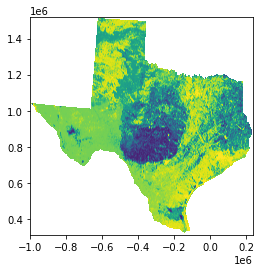

<AxesSubplot:>

In [49]:
show(img)

img.meta

In [50]:
img.crs

CRS.from_epsg(5070)

In [51]:
img.crs.to_wkt()

'PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

## Projecting them so both the Raster and Vector files are in same projection, so they can be overlaid

In [35]:
geodf_buffaloBayou.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [53]:
img.crs

CRS.from_epsg(5070)

In [54]:
img.crs.to_wkt()

'PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [55]:
img.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 41251,
 'height': 40235,
 'count': 1,
 'crs': CRS.from_epsg(5070),
 'transform': Affine(30.0, 0.0, -1000365.0,
        0.0, -30.0, 1517955.0)}

In [37]:
#geodf_buffaloBayou_projected = geodf_buffaloBayou.to_crs(img.crs)
geodf_buffaloBayou_projected = geodf_buffaloBayou

In [38]:
geodf_buffaloBayou_projected.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [39]:
geodf_buffaloBayou_projected[0:1]

,permanent_,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_per,ftype,fcode,mainpath,innetwork,visibility,SHAPE_Leng,Enabled,ObjectID,geometry
47,113254399,2012-01-04,2,01372802,Buffalo Bayou,0.359,12040104000055,1,None,460,46006,0,1,5000000,0.003579,1,48,"LINESTRING Z (-95.48178 29.77218 0.00000, -95...."


In [40]:

#geodf_buffaloBayou_projected2 = geodf_buffaloBayou.to_crs("EPSG:5070")

In [41]:
#geodf_buffaloBayou_projected2.crs

In [42]:
#geodf_buffaloBayou_projected2[0:1]

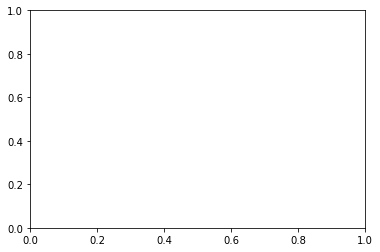

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

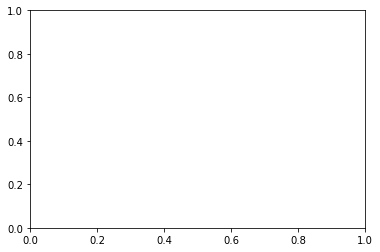

In [43]:
## Followed https://geobgu.xyz/py/rasterio.html
fig, ax = plt.subplots()
base = show(img)
geodf_buffaloBayou_projected.plot( edgecolor="red");

## Make polygons with buffer

In [44]:
geodf_buffaloBayou_projected['buffer_geometry'] = geodf_buffaloBayou_projected.geometry.buffer(0.001)

/var/folders/ry/tr7t3nh122z_0n6rz2cl3lv40000gn/T/ipykernel_91556/3837858789.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodf_buffaloBayou_projected['buffer_geometry'] = geodf_buffaloBayou_projected.geometry.buffer(0.001)
/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [45]:
geodf_buffaloBayou_projectedB = geodf_buffaloBayou_projected.drop(columns=['geometry'])
geodf_buffaloBayou_projectedB['geometry'] = geodf_buffaloBayou_projectedB['buffer_geometry']
geodf_buffaloBayou_projectedB = geodf_buffaloBayou_projectedB.drop(columns=['buffer_geometry'])

geodf_buffaloBayou_projectedB[0:2]

/var/folders/ry/tr7t3nh122z_0n6rz2cl3lv40000gn/T/ipykernel_91556/3188319749.py:2: FutureWarning: Setting geometries to a GeoDataFrame without a geometry column will currently preserve the CRS, if present. This is deprecated, and in the future the CRS will be lost in this case. You can use set_crs(..) on the result to set the CRS manually.
  geodf_buffaloBayou_projectedB['geometry'] = geodf_buffaloBayou_projectedB['buffer_geometry']


,permanent_,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_per,ftype,fcode,mainpath,innetwork,visibility,SHAPE_Leng,Enabled,ObjectID,geometry
47,113254399,2012-01-04,2,01372802,Buffalo Bayou,0.359,12040104000055,1,None,460,46006,0,1,5000000,0.003579,1,48,"POLYGON ((-95.48261 29.77275, -95.48260 29.772..."
89,113254947,2012-01-04,2,01372802,Buffalo Bayou,0.139,12040104002441,1,120007513,558,55800,0,1,5000000,0.001425,1,90,"POLYGON ((-95.10983 29.74131, -95.10973 29.741..."


TypeError: show() got an unexpected keyword argument 'ax'

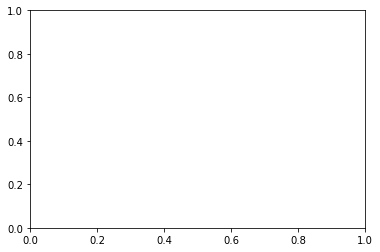

In [46]:
## Followed https://geobgu.xyz/py/rasterio.html
fig, ax = plt.subplots()
base = show(img, ax=ax)
geodf_buffaloBayou_projectedB.plot(ax=ax, edgecolor="red");

In [96]:
from rasterio.mask import mask

In [100]:


out, _ = mask(img, geodf_buffaloBayou_projectedB.geometry, crop=True)

RasterioIOError: Dataset is closed: ../Data-Exploration-2/landcover_USGS_texas/gaplf2011lc_v30_tx.tif

In [69]:
out

array([[[-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        ...,
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768]]],
      dtype=int16)

In [70]:
_

Affine(30.0, 0.0, 16755.0,
       0.0, -30.0, 744375.0)

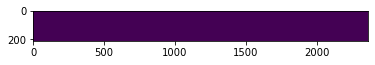

<AxesSubplot:>

In [71]:
show(out)

In [72]:
out2, _2 = mask(img, geodf_buffaloBayou_projectedB.geometry)

In [73]:
out2

array([[[-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        ...,
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768]]],
      dtype=int16)

In [74]:
np.max(out2)

-32768

In [75]:
np.min(out2)

-32768

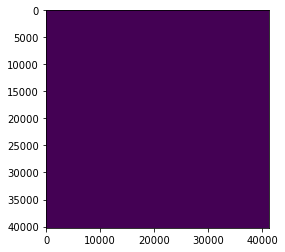

<AxesSubplot:>

In [76]:
show(out2)

In [77]:
_2

Affine(30.0, 0.0, -1000365.0,
       0.0, -30.0, 1517955.0)

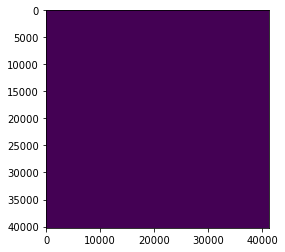

<AxesSubplot:>

In [78]:
## Followed https://geobgu.xyz/py/rasterio.html
fig, ax = plt.subplots()
base = show(img, ax=ax)
show(out2)

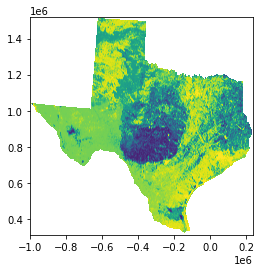

<AxesSubplot:>

In [79]:
show(img)

In [50]:
path_buffaloBayouTestGeojson = os.path.join(data_folder_path,"buffaloBayouTestGeojson.geojson")

In [51]:
path_buffaloBayouTestGeojson

'../Data-Exploration-3/buffaloBayouTestGeojson.geojson'

In [52]:
geodf_buffaloBayou_projectedB.to_file(path_buffaloBayouTestGeojson, driver="GeoJSON")  

In [53]:
geodf_buffaloBayou_projectedOnlyBufferGeoRead = gpd.read_file(path_buffaloBayouTestGeojson )

In [54]:
geodf_buffaloBayou_projectedOnlyBufferGeoRead.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [55]:
import fiona

In [56]:
with fiona.open(path_buffaloBayouTestGeojson, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [57]:
shapes

[{'type': 'Polygon',
  'coordinates': [[(-95.48261387997346, 29.772747389295635),
    (-95.4826026142567, 29.77284138001742),
    (-95.4825789107488, 29.77294475555285),
    (-95.48254439214924, 29.773045039269856),
    (-95.48254164725702, 29.773051821622566),
    (-95.4825412480981, 29.773053808924455),
    (-95.48251575547948, 29.773153729214084),
    (-95.48248010823093, 29.773250492903323),
    (-95.4824346854231, 29.773343071013105),
    (-95.48237997007928, 29.773430479073575),
    (-95.48224137007949, 29.7736284124066),
    (-95.48216607630593, 29.77372316994071),
    (-95.4820798865495, 29.773808137396212),
    (-95.48195388654965, 29.77391813739605),
    (-95.48186927628005, 29.773984342692383),
    (-95.48177805187528, 29.774041089031076),
    (-95.48168126625094, 29.77408772144368),
    (-95.48153633291784, 29.774148188110264),
    (-95.48145591963402, 29.7741777597847),
    (-95.48119765296775, 29.77426035978457),
    (-95.48111549443435, 29.774282827674668),
    (-95.4810

In [88]:
#geodf_buffaloBayou_projectedOnlyBufferGeoRead_updatedCRS_toGeoJSON2 = [json.loads(shapes)]

In [89]:
with img as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

In [90]:
out_transform

Affine(30.0, 0.0, 16755.0,
       0.0, -30.0, 744375.0)

In [91]:
out_meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 41251,
 'height': 40235,
 'count': 1,
 'crs': CRS.from_epsg(5070),
 'transform': Affine(30.0, 0.0, -1000365.0,
        0.0, -30.0, 1517955.0)}

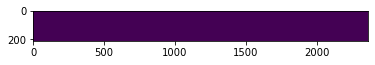

<AxesSubplot:>

In [92]:
show(out_image)

In [93]:
np.max(out_image)

-32768

#### Why is all the values no data when there should be values and the polygon seems to overlap when plotted?

In [ ]:
geodf_buffaloBayou_projectedB[0:2]

In [ ]:
import rioxarray

In [ ]:
landcover_tiff = rioxarray.open_rasterio(path_USGS_GAP_Landcover_tiff_texas)

In [ ]:

clipped = landcover_tiff.rio.clip(geodf_buffaloBayou_projectedB.geometry, geodf_buffaloBayou_projectedB.crs, drop=False, invert=True)

In [ ]:
clipped

In [ ]:
clipped.plot()

https://carpentries-incubator.github.io/geospatial-python/aio/index.html

https://github.com/perrygeo/python-rasterstats

https://discourse.pangeo.io/t/intersecting-shapefiles-and-raster-data-at-scale-good-design-patterns/1188